# VECTORIZATION OF TEXT DATA

In [41]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/srk-practicum/2022-knu-nlp/kachaikin_branch/Task1_Kachaikin/root2ai%20-%20Data.csv'
df = pd.read_csv(url)
df['Text'].str.replace(r'[.,!?;:()/]{,1}','')
df['Text'].str.replace(r'\s{2,}','')
df['Text'].str.lower()

u=list(df['Text'])
v=list(df['Target'])
indexes_for_labels=sorted([i for i in set(list(df['Target']))])
df_ls=[ [u[i], indexes_for_labels.index(v[i])] for i in range(len(u))]

df=pd.DataFrame()
df['Text']=u
df['Target']=[i[1] for i in df_ls]



X_train, X_test, y_train, y_test = train_test_split(df['Text'], 
                                                    df['Target'], test_size=0.5 ,
                                                    random_state=0)






vectorizer=TfidfVectorizer(stop_words=stopwords.words("english"),min_df = 5)

X_train_vectorized = vectorizer.fit_transform(X_train)
X_train_vectorized = X_train_vectorized.toarray()

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Target
0,reserve bank forming expert committee based in...,1
1,director could play role financial system,1
2,preliminary discuss secure transaction study r...,1
3,security indeed prove essential transforming f...,1
4,bank settlement normally take three days based...,1
...,...,...
22699,fourth study discusses blockchain technology e...,7
22700,book finishes stating biggest issue emerging F...,7
22701,people culture cess,7
22702,author challenges execu tive lead change stop ...,7


# TRAINING MODEL

In [42]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



inputs=keras.Input(shape=(2863,))
dense = layers.Dense(32, activation="relu")
x = dense(inputs)
x = layers.Dense(32, activation="relu")(x)

x = layers.Dropout(0.5)(x)

x = layers.Dense(32, activation="relu")(x)

outputs = layers.Dense(11,activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="My_First_NN")
model.summary()

model.compile(
    optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
)

history = model.fit(X_train_vectorized, y_train, batch_size=32, epochs=40, validation_split=0.2)




Model: "My_First_NN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 2863)]            0         
                                                                 
 dense_80 (Dense)            (None, 32)                91648     
                                                                 
 dense_81 (Dense)            (None, 32)                1056      
                                                                 
 dropout_17 (Dropout)        (None, 32)                0         
                                                                 
 dense_82 (Dense)            (None, 32)                1056      
                                                                 
 dense_83 (Dense)            (None, 11)                363       
                                                                 
Total params: 94,123
Trainable params: 94,123
Non-train

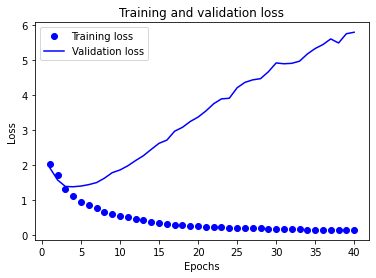

In [43]:
history_dict = history.history
history_dict.keys()
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [44]:
import numpy as np

X_test_vectorized = vectorizer.transform(X_test.apply(lambda x: np.str_(x)))
X_test_vectorized = X_test_vectorized.toarray()
score = model.evaluate(X_test_vectorized, y_test, verbose=0) 

print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 5.643506050109863
Test accuracy: 0.5663319230079651
